# Data Description---

I worked on **2013 sales** data for **1559 products**, which have been sold in **10 stores** in different cities. Also, certain attributes of each product and store have been defined. The goal is to build a model and find out the sales of each product at a particular store.

Using this model It will try to understand the properties of products and stores which play a key role in increasing sales.You need to predict the sales for test data set.



In [50]:
import pandas as pd

train = pd.read_csv("Train_UWu5bXk.csv")
train['Item_Outlet_Sales'] = train['Item_Outlet_Sales'].round(2)
test = pd.read_csv("Test_u94Q5KV.csv")
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=False)
pd.options.display.float_format = '{:,.2f}'.format
data
#print (train.shape, test.shape, data.shape)


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.81,"3,735,138.00",Dairy,0.02,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.27,443.42,Soft Drinks,0.02,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,"141,618.00","2,097.27",Meat,0.02,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,"182,095.00",732.38,Fruits and Vegetables,0.00,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.86,994.71,Household,0.00,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.40,556.61,Baking Goods,0.00,"10,395.00",2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.66,343.55,Snack Foods,0.01,13.65,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.76,"4,022.76",Snack Foods,0.13,nan,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.97,"1,076.60",Frozen Foods,0.02,16.20,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
9,Regular,FDU28,187.82,"4,710,535.00",Frozen Foods,0.09,19.20,2007,OUT017,Tier 2,NaN,Supermarket Type1,train


**FIELDS DESCRIPTION**

|Field  |       Description     |
|-------------------------------|
| Item_Identifier  |   Product ID |
| Item_Weight  |   Weight of Product |
| Item_Fat_Content|   Whether the product is low fat or not |
| Item_Visibility  |   The % of total display area of all products in a store allocated to the particular product |
| Item Type | The category to which the product belongs  |
| Item MRP | Maximum Retail Price (list price) of the product |
| Outlet_Identifier | Store ID |
| Outlet_Establishment_Year | The year in which store was established |
| Outlet_Size | The size of the store, evaluating ground area covered |
| Outlet_Location_Type | The type of city in which the store is located |
| Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket |
| dataset source | if the example is from the <i>training set</i> or from the  <i>test set</i>
| Item_Outlet_Sales | Sales of the product in the particulat store. <b>This is the outcome variable to be predicted</b>



In [51]:
#MISSING VALUES#
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [52]:
data.describe()
#NUMERICAL VARIABLES#

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,"14,204.00","8,523.00","14,204.00","11,765.00","14,204.00"
mean,"16,254.72","665,015.26",0.07,775.42,"1,997.83"
std,"49,347.24","1,374,419.32",0.05,"2,375.87",8.37
min,31.29,33.29,0.00,4.55,"1,985.00"
25%,99.47,"1,186.46",0.03,9.80,"1,987.00"
50%,152.57,"2,852.29",0.05,14.30,"1,999.00"
75%,213.46,"634,174.50",0.09,18.35,"2,004.00"
max,"264,891.00","11,445,102.00",0.33,"11,395.00","2,009.00"


It is possible observing that the <i>Outlet_Establishment_Year</i> vary from 1985 to 20009. The min val for <i>Item_Visibility</i> is 0; but this has no sense.

In [53]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8483
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    554
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

By analyzing the unique values for the categorical variables there are **1559 products** and **10 different store**

**SELECT THE CATEGORICAL VARIABLES:**

**Now we analyze the variable that indicate the location type and the outlet type , as well; these surely are important to predict the outcome**


Frequency of Categories for varible **Outlet_Location_Type**


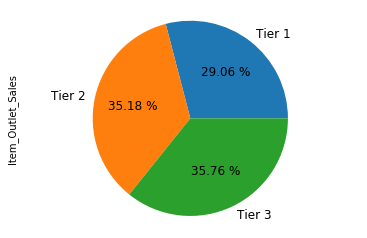


Frequency of Categories for varible **Outlet_Type**


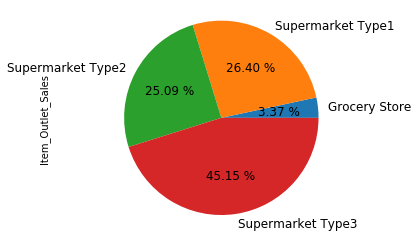

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print ('\nFrequency of Categories for varible **Outlet_Location_Type**')
#data.Item_Outlet_Sales.groupby(data.Outlet_Location_Type).sum().plot(kind='pie',fontsize=12,autopct='%.2f %%')
data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot(kind='pie',fontsize=12,autopct='%.2f %%')
plt.axis('equal') 
plt.show()
print ('\nFrequency of Categories for varible **Outlet_Type**')
#data.Item_Outlet_Sales.groupby([data.Outlet_Type]).sum()#.plot(kind='pie',fontsize=12,autopct='%.2f %%')
data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot(kind='pie',fontsize=12,autopct='%.2f %%')
plt.axis('equal') 
plt.show()

szOutTp1 = (data['Outlet_Type'] == 'Supermarket Type1') 
szOutTp2 = (data['Outlet_Type'] == 'Supermarket Type2')
szOutTp3 = (data['Outlet_Type'] == 'Supermarket Type3')


**The Hypotheses:**Basically I already filtered the Hypotheses on the base of the data in the training and test set.
<br>
By analyzing the data, I am going to assume some  **Hypotheses**. 
Mainly I will analyze how the Income is related to: the **Product** and the **Store**.
<br>
<br>
**Product Hypotheses:**
<br>
- Products placed in a larger space than others will probably capture the attention of major customers and sell more.
<br>

**Store Hypotheses:**
<br>
- The bigger the store is, the more products that are required by a customer will be sold.
  Stores located in urban or Tier 1 cities should have higher sales because of the higher income         levels of people

**The Hypotheses:**Basically I already filtered the Hypotheses on the base of the data in the training and test set.
<br>
By analyzing the data, I am going to assume some  **Hypotheses**. 
Mainly I will analyze how the Income is related to: the **Product** and the **Store**.
<br>
<br>
**Product Hypotheses:**
<br>
- Products placed in a larger space than others will probably capture the attention of major customers and sell more.
<br>

**Store Hypotheses:**
<br>
- The bigger the store is, the more products that are required by a customer will be sold.
  Stores located in urban or Tier 1 cities should have higher sales because of the higher income         levels of people

In [46]:
import warnings;
warnings.simplefilter('ignore')
import math
import statistics
import numpy as np

#Determing the mode for each
OutletTypeVal =list(set(data.Outlet_Type))

Mode_Outlet_Size_dic = {}
for indx, val in enumerate(OutletTypeVal):
    outletSz = data['Outlet_Size'].isin(['High','Small','Medium'])
    outletTp = data['Outlet_Type'] == OutletTypeVal[indx]
    
    OutletTypeVal[indx]= data[(outletTp)].Outlet_Size
    Mode_Outlet_Size_dic[val] = statistics.mode(OutletTypeVal[indx])
    if (indx != 1):
        Mode_Outlet_Size_dic[val] = statistics.mode(OutletTypeVal[indx])
    else:
        valuesNoNan = [x for x in OutletTypeVal[indx] if pd.isnull(x) == False]
        Mode_Outlet_Size_dic[val] = statistics.mode(valuesNoNan)
    
        
print('Most present value for -Supermarket Type1- size: '+Mode_Outlet_Size_dic['Supermarket Type1'])
print('Most present value for -Supermarket Type2- size: '+Mode_Outlet_Size_dic['Supermarket Type2'])
print('Most present value for -Supermarket Type3- size: '+Mode_Outlet_Size_dic['Supermarket Type3'])
print('Most present value for -Grocery Store- size: '+Mode_Outlet_Size_dic['Grocery Store'])


Most present value for -Supermarket Type1- size: Small
Most present value for -Supermarket Type2- size: Medium
Most present value for -Supermarket Type3- size: Medium
Most present value for -Grocery Store- size: Small


Now we substitute di Nan value with the most frequent value for each Market Type:

In [48]:
szOutTp1 = (data.Outlet_Type == 'Supermarket Type1') 
szOutTp2 = (data.Outlet_Type == 'Supermarket Type2') 
szOutTp3 = (data.Outlet_Type == 'Supermarket Type3') 
szOutGrocStr = (data.Outlet_Type == 'Grocery Store')

data1 = data[(szOutTp1)]
data2 = data[(szOutTp2)]
data3 = data[(szOutTp3)]
data4 = data[(szOutGrocStr)]
data1['Outlet_Size'].fillna(Mode_Outlet_Size_dic['Supermarket Type1'], inplace=True)
data2['Outlet_Size'].fillna(Mode_Outlet_Size_dic['Supermarket Type2'], inplace=True)
data3['Outlet_Size'].fillna(Mode_Outlet_Size_dic['Supermarket Type3'], inplace=True)
data4['Outlet_Size'].fillna(Mode_Outlet_Size_dic['Grocery Store'], inplace=True)
#data1['Outlet_Size']
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')


,Item_Outlet_Sales
Outlet_Type,
Grocery Store,"88,164.57"
Supermarket Type1,"691,504.70"
Supermarket Type2,"657,188.52"
Supermarket Type3,"1,182,941.41"


It is possible observing that the Item_Outlet_Sales mean for **Supermarket Type1** and **Supermarket Type2** are similar; we are going to consider only one type of market for both. We will name this **Supermarket Type1-2**


Frequency of Categories for varible ------- **Outlet_Type**


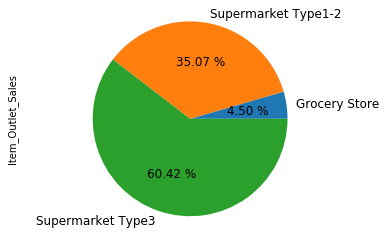

In [49]:
data.Outlet_Type[data.Outlet_Type == 'Supermarket Type1'] = 'Supermarket Type1-2'
data.Outlet_Type[data.Outlet_Type == 'Supermarket Type2'] = 'Supermarket Type1-2'

print ('\nFrequency of Categories for varible ------- **Outlet_Type**')
#data.Item_Outlet_Sales.groupby(data.Outlet_Type).sum().plot(kind='pie',fontsize=12,autopct='%.2f %%')
data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot(kind='pie',fontsize=12,autopct='%.2f %%')
plt.axis('equal') 
plt.show()


Remembering we underlined the 0.00 value for the Item_Visibility field for some product and that It has no sense; we will replace the 0 value with mean for that product.

In [60]:
visibilityVal = data.loc[data.Item_Visibility > 0.00, 'Item_Visibility']   #.Item_Visibility.
visibilityMean = np.mean(visibilityVal)
visibilityMean = round(visibilityMean,2)
#Values == 0 mean missing values 
data.loc[data.Item_Visibility == 0.00, 'Item_Visibility'] = visibilityMean
data.Item_Visibility




0      0.02
1      0.02
2      0.02
3      0.07
4      0.07
5      0.07
6      0.01
7      0.13
8      0.02
9      0.09
10     0.07
11     0.05
12     0.10
13     0.05
14     0.07
15     0.07
16     0.01
17     0.07
18     0.03
19     0.10
20     0.14
21     0.04
22     0.03
23     0.06
24     0.03
25     0.10
26     0.07
27     0.02
28     0.16
29     0.07
       ... 
5651   0.05
5652   0.09
5653   0.03
5654   0.07
5655   0.10
5656   0.16
5657   0.04
5658   0.04
5659   0.04
5660   0.03
5661   0.07
5662   0.03
5663   0.03
5664   0.05
5665   0.02
5666   0.01
5667   0.05
5668   0.29
5669   0.07
5670   0.04
5671   0.05
5672   0.04
5673   0.09
5674   0.03
5675   0.07
5676   0.01
5677   0.14
5678   0.07
5679   0.07
5680   0.10
Name: Item_Visibility, Length: 14204, dtype: float64